# Topic Modelling
This notebook runs all models for topic modelling and visualizes results to select the best topic model.

In [1]:
# run this if you run into "ModuleNotFoundError: No module named 'src'"
import sys
sys.path.insert(0, '../src')

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# importing modules
import transformations as c
from topic_modelling.train.train_lda import train_lda
from topic_modelling.train.train_nmf import train_nmf
from topic_modelling.train.LSA import *

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zyn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zyn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\zyn\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zyn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
# loading data
current_path = os.getcwd()
root_path = os.path.dirname(current_path)
df = pd.read_csv(root_path + '/data/reviews.csv', encoding='unicode_escape')

In [6]:
# clean data
df['stem_clean_text'] = df['Text'].apply(lambda x: c.get_cleantext(x, stemming=True))

df['clean_text'] = df['Text'].apply(lambda x: c.get_cleantext(x))
df['clean_text'] = df['clean_text'].apply(lambda x: c.lemmatize_text(x))
df['clean_text'] = df['clean_text'].apply(lambda x: c.words_remove(x))

In [7]:
#feature engineering
df_bow = c.new_bow(df['clean_text'].tolist())
df_tfidf = c.new_tfidf(df['clean_text'].tolist())

In [ ]:
# run LDA, NMF
num_topics = 20
n_top_words = 10
lda_topic_words, lda_pred, lda_model = train_lda(df, num_topics=num_topics, n_top_words=n_top_words)
nmf_topic_words, nmf_pred, nmf_model = train_nmf(df, num_topics=num_topics, n_top_words=n_top_words)

In [ ]:
# add topic predictions to df
df['lda_pred'] = lda_pred
df['nmf_pred'] = nmf_pred

## View top words of each topic

In [10]:
#LSA model
for i in range(3,10):
    print("\nnumber of topics:"+str(i))
    print("Bag of Words")
    t1 = lsa(df_bow, i)
    print("\nTF-IDF")
    t2=lsa(df_tfidf, i)


number of topics:3
Bag of Words

 Topic 0:  taste flavor good product make great well coffee food would 
 Topic 1:  food product dog cat eat stool baby make formula ingredient 
 Topic 2:  tea bag green drink black leaf iced white loose flavor 
TF-IDF

 Topic 0:  taste great good coffee flavor product love tea make price 
 Topic 1:  coffee tea cup strong drink flavor brew green bitter roast 
 Topic 2:  tea green drink iced bag leaf love black loose ice 
number of topics:4
Bag of Words

 Topic 0:  taste flavor good product make great well coffee food would 
 Topic 1:  food product dog cat eat stool baby make formula ingredient 
 Topic 2:  tea bag green drink black leaf iced white loose flavor 
 Topic 3:  stool water baby constipation formula infant sugar colon taste milk 
TF-IDF

 Topic 0:  taste great good coffee flavor product love tea make price 
 Topic 1:  coffee tea cup strong drink brew flavor green bitter roast 
 Topic 2:  tea green drink iced bag love leaf black loose ice 
 Topi

In [87]:
print("Top ", n_top_words, " words in ", num_topics, " topics for LDA model:")
for (topic_idx, words) in lda_topic_words:
    print("Topic ", topic_idx, ": ", words)

Top  10  words in  20  topics for LDA model:
Topic  0 :  0.289*"coffe" + 0.186*"cup" + 0.041*"flavor" + 0.031*"ground" + 0.028*"like" + 0.027*"morn" + 0.026*"tast" + 0.024*"tri" + 0.023*"avoid" + 0.022*"mention"
Topic  1 :  0.123*"tea" + 0.059*"away" + 0.050*"bean" + 0.048*"return" + 0.044*"wast" + 0.043*"powder" + 0.036*"cake" + 0.035*"half" + 0.035*"green" + 0.022*"abl"
Topic  2 :  0.164*"chocol" + 0.123*"cooki" + 0.067*"jar" + 0.046*"wonder" + 0.044*"avail" + 0.044*"consum" + 0.043*"sick" + 0.042*"number" + 0.039*"earth" + 0.026*"die"
Topic  3 :  0.318*"thought" + 0.148*"help" + 0.114*"kid" + 0.084*"rate" + 0.002*"granddaught" + 0.000*"hot" + 0.000*"hip" + 0.000*"paid" + 0.000*"descript" + 0.000*"money"
Topic  4 :  0.182*"enjoy" + 0.081*"unfortun" + 0.075*"cereal" + 0.068*"bottom" + 0.054*"blend" + 0.050*"realli" + 0.041*"certainli" + 0.041*"addict" + 0.035*"mini" + 0.020*"worri"
Topic  5 :  0.089*"oil" + 0.058*"smell" + 0.045*"pop" + 0.040*"absolut" + 0.039*"cream" + 0.037*"continu

In [88]:
print("Top ", n_top_words, " words in ", num_topics, " topics for NMF model:")
for [topic_idx, words] in nmf_topic_words:
    print("Topic ", topic_idx, ": ", words)

Top  10  words in  20  topics for NMF model:
Topic  0 :  ['like', 'tast', 'tast like', 'dont', 'realli', 'better', 'realli like', 'much', 'didnt', 'like tast']
Topic  1 :  ['coffe', 'cup', 'brew', 'roast', 'cup coffe', 'bean', 'strong', 'coffe tast', 'tast coffe', 'blend']
Topic  2 :  ['tea', 'green tea', 'green', 'ice tea', 'ice', 'brew', 'drink', 'tea tast', 'black tea', 'tea bag']
Topic  3 :  ['price', 'amazon', 'great price', 'ship', 'buy', 'good price', 'get', 'save', 'subscrib', 'price amazon']
Topic  4 :  ['great', 'tast great', 'tast', 'great tast', 'love', 'great price', 'great product', 'make great', 'work', 'kid']
Topic  5 :  ['bar', 'snack', 'tasti', 'healthi', 'eat', 'calori', 'protein', 'sweet', 'nut', 'peanut']
Topic  6 :  ['dog', 'treat', 'love', 'china', 'dog love', 'made', 'made china', 'dog food', 'chicken', 'food']
Topic  7 :  ['free', 'gluten', 'gluten free', 'cooki', 'pasta', 'mix', 'sugar', 'sugar free', 'free diet', 'rice']
Topic  8 :  ['drink', 'juic', 'orang',

## View word cloud of predicted topics

In [131]:
def display_wordclouds(df, pred_col, num_topics):
    fig = plt.figure(figsize=(20,10))
    j = int(np.ceil(num_topics/4))
    for t in range(num_topics):
        # Join the different processed titles together.
        long_string = ','.join(list(df[df[pred_col]==t]['stem_clean_text'].values))
        # Create a WordCloud object
        wordcloud = WordCloud(width=700, height=250, 
                              background_color="white", 
                              max_words=500)
        if len(long_string)==0:
            long_string = 'None'
        # Generate a word cloud
        wordcloud.generate(long_string)
        i=t+1
        plt.subplot(j, 4, i).set_title("Topic #" + str(t))
        plt.plot()
        plt.imshow(wordcloud)
        plt.axis("off")
    # plt.title(pred_col[:3].upper() + " Topics")
    plt.suptitle(pred_col[:3].upper() + " Topics", fontsize=30)
    plt.tight_layout()
    plt.show()

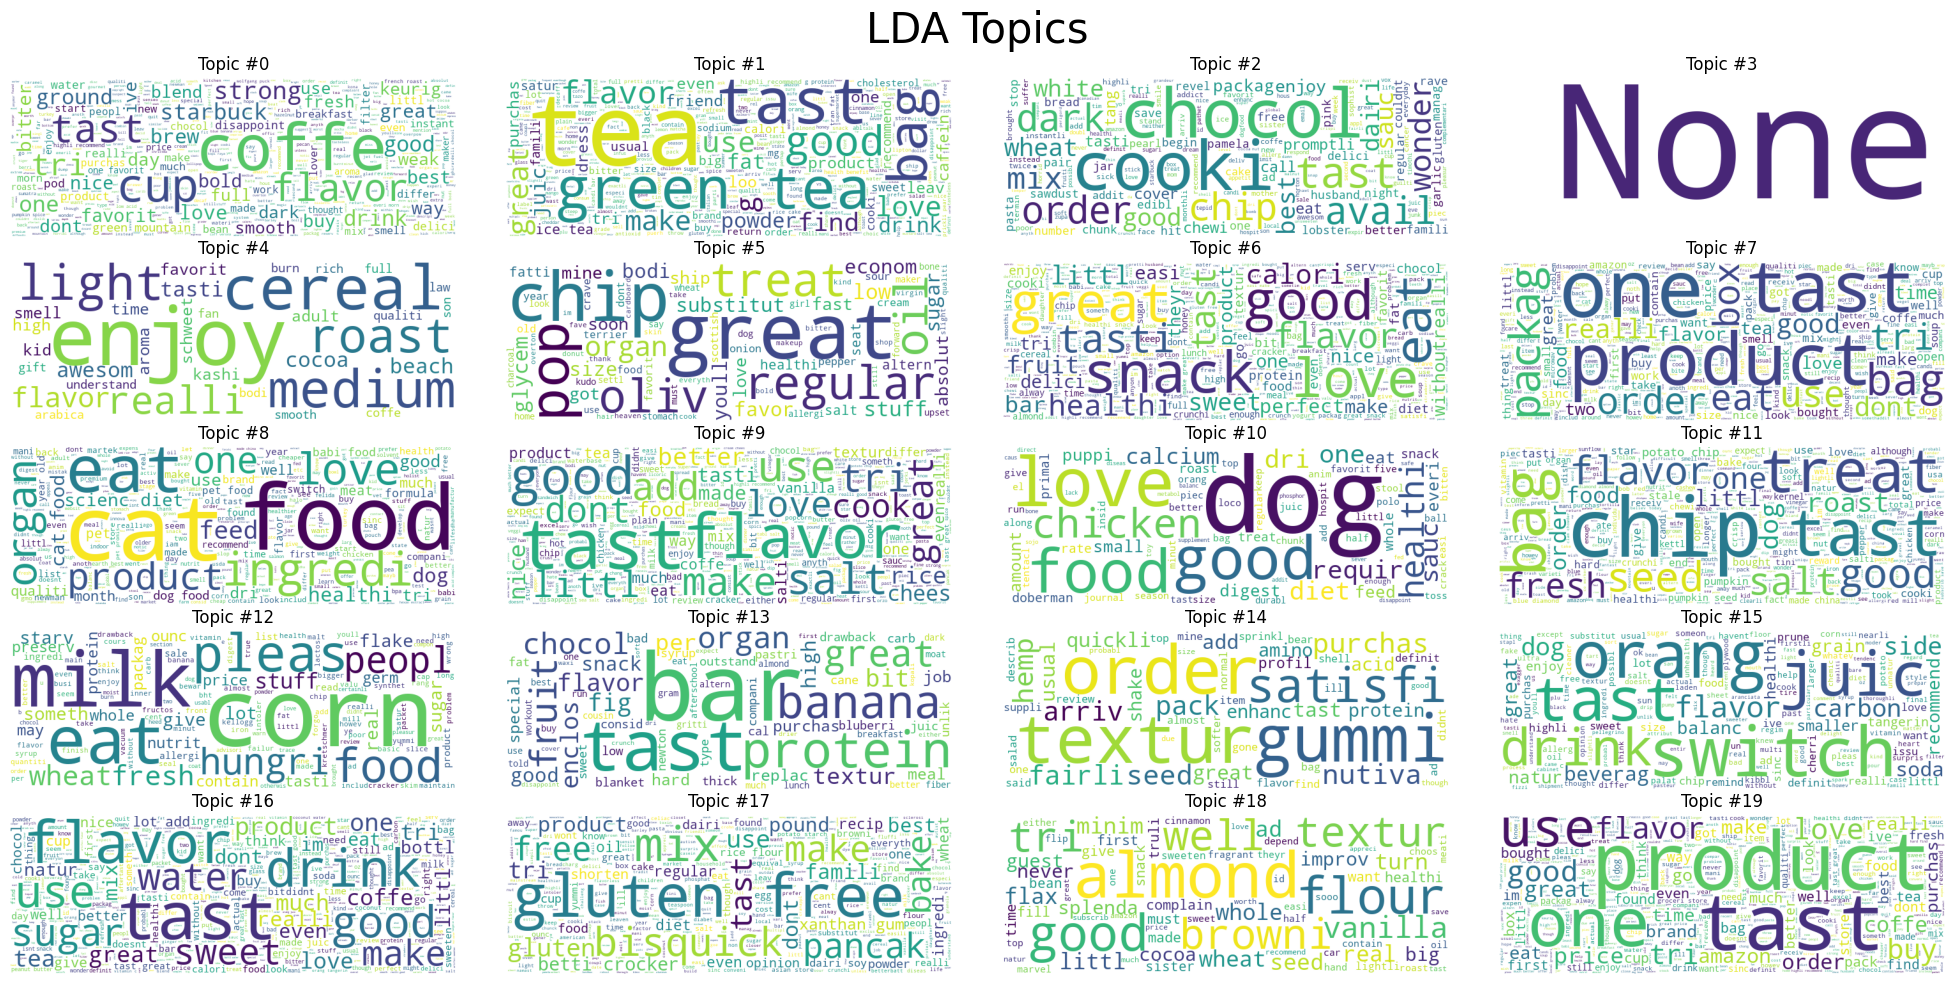

In [132]:
display_wordclouds(df, 'lda_pred', num_topics=num_topics)

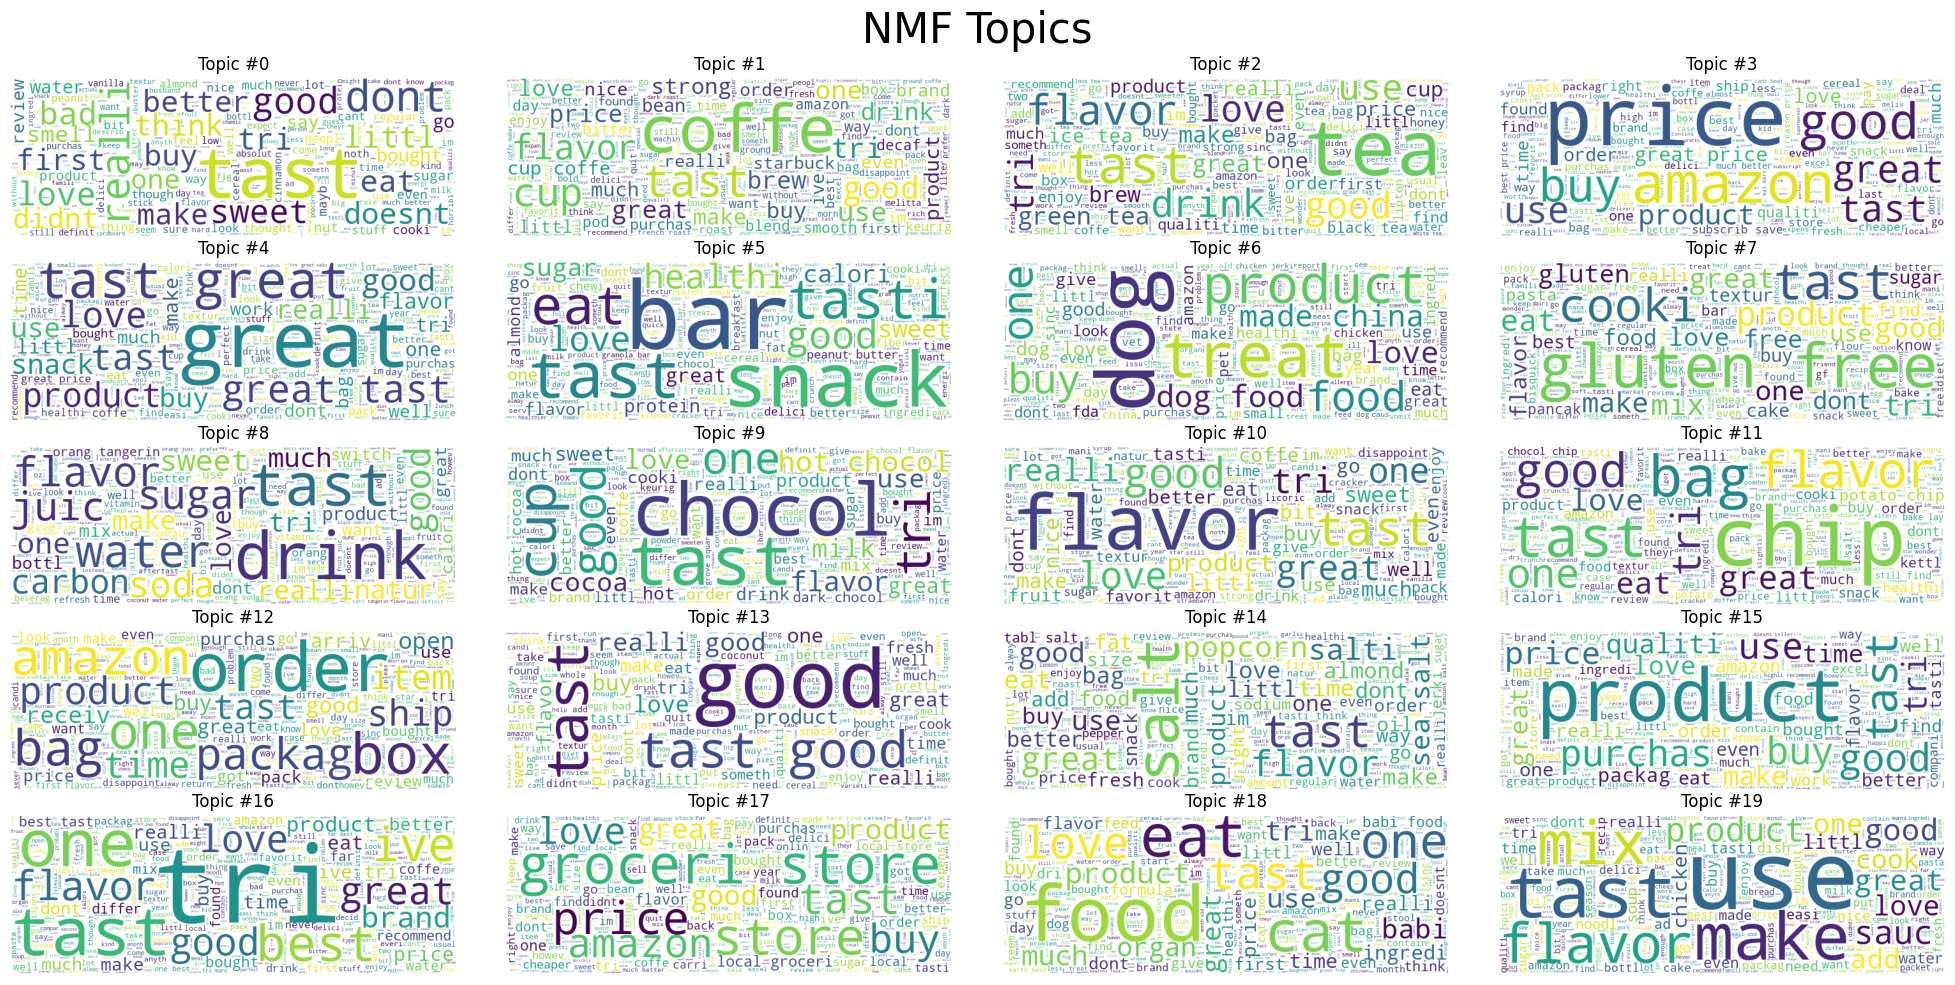

In [133]:
display_wordclouds(df, 'nmf_pred', num_topics=num_topics)